
# EEG Data Analysis
### Introduction
This script will guide you through the process of analyzing EEG data from raw recordings. The steps include loading data, preprocessing, event extraction, epoching, and Independent Component Analysis (ICA) for artifact removal. 

We will compare average responses for animate and inaimate stimulus conditions. (We will decode animate from inaimate stimli in the next section)

### Importing Required Libraries
Before we start, let's import the necessary libraries. The [MNE](https://mne.tools/stable/index.html) toolbox allow us to load, preprocess, and visualize the EEG data.

In [1]:
%matplotlib inline

# Import necessary libraries
import mne
import numpy as np
import matplotlib.pyplot as plt   # data visulization 

from lib.designs import get_event_id

### Load and Preprocess the Raw EEG Data
Next, we will load the raw EEG data from a .vhdr file. This file contains information about the EEG signals recorded during an experiment.

In [2]:
# Define the path to your raw EEG file (.vhdr)
raw_file_path = '/Users/ruosiwang/sandbox/sisu-eeg-bootcamp/raw/EEG/Pilot1_241213.vhdr'

# Load the raw EEG data
raw = mne.io.read_raw_brainvision(raw_file_path, preload=True)

# Apply preprocessing (optional, adjust parameters as needed)
# 1. Bandpass filter (1-40 Hz) to remove low-frequency drifts and high-frequency noise
raw.filter(1., 40., fir_design='firwin')


Extracting parameters from /Users/ruosiwang/sandbox/sisu-eeg-bootcamp/raw/EEG/Pilot1_241213.vhdr...
Setting channel info structure...
Reading 0 ... 1961239  =      0.000 ...  1961.239 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


<RawBrainVision | Pilot1_241213.eeg, 31 x 1961240 (1961.2 s), ~463.9 MiB, data loaded>

In [3]:
raw.ch_names

['Fp1',
 'Fz',
 'F3',
 'F7',
 'FT9',
 'FC5',
 'FC1',
 'C3',
 'T7',
 'TP9',
 'CP5',
 'CP1',
 'Pz',
 'P3',
 'P7',
 'O1',
 'O2',
 'P4',
 'P8',
 'TP10',
 'CP6',
 'CP2',
 'Cz',
 'C4',
 'T8',
 'FT10',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'Fp2']

In [4]:
#raw.plot();

In [5]:
# parse events from annotations
trigger_id = get_event_id(map_type='trigger')
trigger_id


{'Stimulus/S  1': 1,
 'Stimulus/S  2': 2,
 'Stimulus/S  3': 3,
 'Stimulus/S  4': 4,
 'Stimulus/S  5': 5,
 'Stimulus/S  6': 6,
 'Stimulus/S  7': 7,
 'Stimulus/S  8': 8,
 'Stimulus/S  9': 9,
 'Stimulus/S 10': 10,
 'Stimulus/S 11': 11,
 'Stimulus/S 12': 12,
 'Stimulus/S 13': 13,
 'Stimulus/S 14': 14,
 'Stimulus/S 15': 15,
 'Stimulus/S 16': 16,
 'Stimulus/S 17': 17,
 'Stimulus/S 18': 18,
 'Stimulus/S 19': 19,
 'Stimulus/S 20': 20,
 'Stimulus/S 21': 21,
 'Stimulus/S 22': 22,
 'Stimulus/S 23': 23,
 'Stimulus/S 24': 24,
 'Stimulus/S 25': 25,
 'Stimulus/S 26': 26,
 'Stimulus/S 27': 27,
 'Stimulus/S 28': 28,
 'Stimulus/S 29': 29,
 'Stimulus/S 30': 30,
 'Stimulus/S 31': 31,
 'Stimulus/S 32': 32,
 'Stimulus/S 33': 33,
 'Stimulus/S 34': 34,
 'Stimulus/S 35': 35,
 'Stimulus/S 36': 36,
 'Stimulus/S 37': 37,
 'Stimulus/S 38': 38,
 'Stimulus/S 39': 39,
 'Stimulus/S 40': 40,
 'Stimulus/S 41': 41,
 'Stimulus/S 42': 42,
 'Stimulus/S 43': 43,
 'Stimulus/S 44': 44,
 'Stimulus/S 45': 45,
 'Stimulus/S 46': 4

### Create Epochs from Events

Epoching allows us to isolate the data associated with each stimulus presentation.
Here are the steps:

First, we extract the events from the raw data. These events correspond to stimuli or responses in the experiment.
Then, we extract the epochs from the defined time windows.

In [6]:
events = mne.events_from_annotations(raw, trigger_id)[0]
events

Used Annotations descriptions: [np.str_('Stimulus/S  1'), np.str_('Stimulus/S  2'), np.str_('Stimulus/S  3'), np.str_('Stimulus/S  4'), np.str_('Stimulus/S  5'), np.str_('Stimulus/S  6'), np.str_('Stimulus/S  7'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 11'), np.str_('Stimulus/S 12'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 15'), np.str_('Stimulus/S 16'), np.str_('Stimulus/S 17'), np.str_('Stimulus/S 18'), np.str_('Stimulus/S 19'), np.str_('Stimulus/S 20'), np.str_('Stimulus/S 21'), np.str_('Stimulus/S 22'), np.str_('Stimulus/S 23'), np.str_('Stimulus/S 24'), np.str_('Stimulus/S 25'), np.str_('Stimulus/S 26'), np.str_('Stimulus/S 27'), np.str_('Stimulus/S 28'), np.str_('Stimulus/S 29'), np.str_('Stimulus/S 30'), np.str_('Stimulus/S 31'), np.str_('Stimulus/S 32'), np.str_('Stimulus/S 33'), np.str_('Stimulus/S 34'), np.str_('Stimulus/S 35'), np.str_('Stimulus/S 36'), np.str_('Stimulus/S 37'), np.str

array([[  91819,       0,      12],
       [  92819,       0,      48],
       [  93818,       0,      51],
       ...,
       [1941487,       0,      24],
       [1942487,       0,       8],
       [1943487,       0,      33]])

In [7]:
events_id = get_event_id()
events_id

{'original/big/animate/object001': 1,
 'original/big/animate/object002': 2,
 'original/big/animate/object003': 3,
 'original/big/animate/object004': 4,
 'original/big/animate/object005': 5,
 'original/big/animate/object006': 6,
 'original/big/animate/object007': 7,
 'original/big/animate/object008': 8,
 'original/big/animate/object009': 9,
 'original/big/animate/object010': 10,
 'original/big/animate/object011': 11,
 'original/big/animate/object012': 12,
 'original/big/animate/object013': 13,
 'original/big/animate/object014': 14,
 'original/big/animate/object015': 15,
 'original/big/inanimate/object016': 16,
 'original/big/inanimate/object017': 17,
 'original/big/inanimate/object018': 18,
 'original/big/inanimate/object019': 19,
 'original/big/inanimate/object020': 20,
 'original/big/inanimate/object021': 21,
 'original/big/inanimate/object022': 22,
 'original/big/inanimate/object023': 23,
 'original/big/inanimate/object024': 24,
 'original/big/inanimate/object025': 25,
 'original/big

In [8]:
# 4. Define the time window for epoching
# For example, a window from 0.2s before the stimulus to 1s after the stimulus

tmin, tmax = -0.2, 1.0

# 5. Create epochs based on the events
epochs = mne.Epochs(
    raw, events, event_id=events_id, 
    tmin=tmin, tmax=tmax, 
    baseline=(None, 0),  # baseline correction from the start of the epoch
    detrend=1,  # detrend the epochs (remove slow drifts)
    preload=True  # load the data into memory for further analysis
)

# 6. Inspect the number of epochs and save the results
print(f"Total number of epochs: {len(epochs)}")

Not setting metadata
960 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 960 events and 1201 original time points ...
0 bad epochs dropped
Total number of epochs: 960


In [9]:
# epochs.plot();

### Independent Component Analysis (ICA)
ICA is a method for artifact removal in EEG data. We use ICA to separate the signals into independent components and then identify and exclude components corresponding to artifacts like eye blinks or muscle movements.

In [10]:

ica = mne.preprocessing.ICA(n_components=20, random_state=0)
ica.fit(raw.copy().filter(8, 35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 1651 samples (1.651 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


Fitting ICA to data using 31 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 114.2s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,50 iterations on raw data (1961240 samples)
ICA components,20
Available PCA components,31
Channel types,eeg
ICA components marked for exclusion,—


In [11]:
bad_idx, scores = ica.find_bads_eog(raw, 'Fp1', threshold=2)
print(bad_idx)

Using EOG channel: Fp1
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.6s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 s)

[np.int64(5), np.int64(6)]


In [12]:
epochs = ica.apply(epochs, exclude=bad_idx)

Applying ICA to Epochs instance


/var/folders/xd/y5p_wp1d6zj1mn17cx7vmd100000gn/T/ipykernel_13048/191692712.py:1: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs = ica.apply(epochs, exclude=bad_idx)


    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 31 PCA components


In [13]:
# epochs.plot();

### Average the Epochs for Different Stimuli
Finally, we calculate the average of the epochs for different stimulus conditions (e.g., animate vs. inanimate stimuli) to inspect the general EEG response.

In [14]:
anim = epochs['animate'].average()
inanim = epochs['inanimate'].average()

No projector specified for this dataset. Please consider the method self.add_proj.


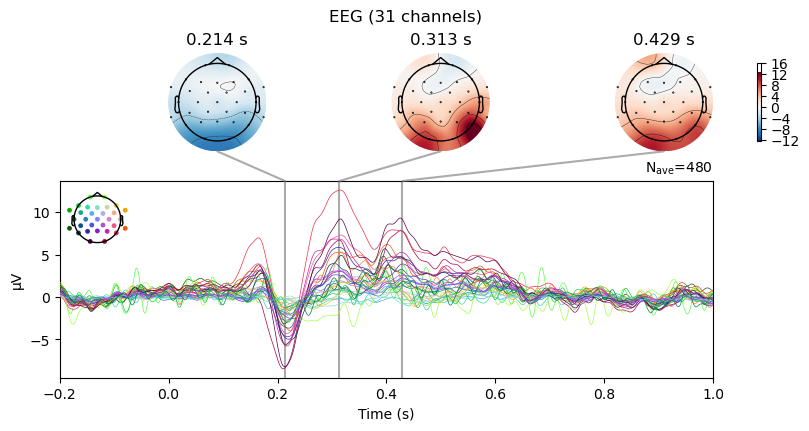

In [15]:

anim.plot_joint();

No projector specified for this dataset. Please consider the method self.add_proj.


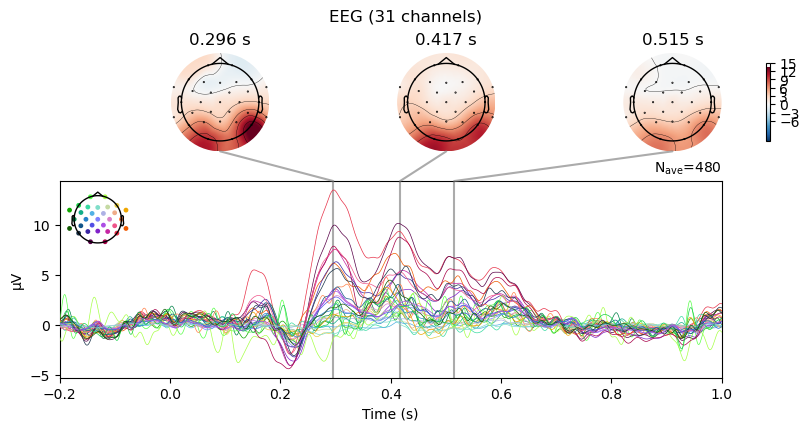

In [16]:
inanim.plot_joint();

No projector specified for this dataset. Please consider the method self.add_proj.


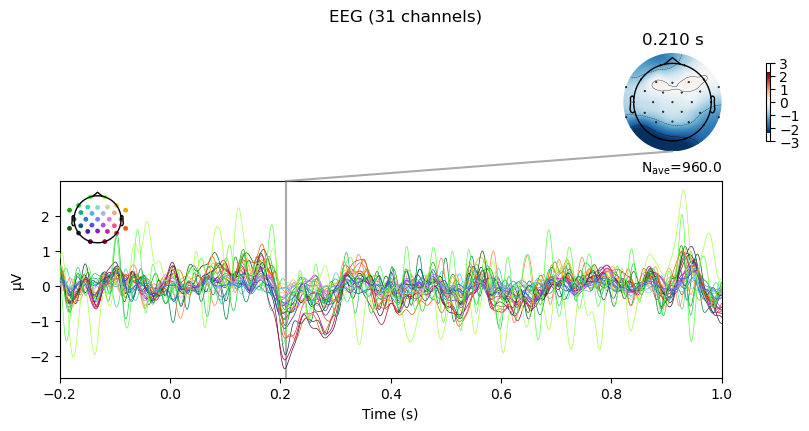

In [17]:
diff = mne.combine_evoked((anim, -inanim), weights='equal')
diff.plot_joint(times=.21);